## GRAPPA reconstruction 
###### Author: Zimu Huo
###### Date: 02.2022


This has the same sampling scheme as SENSE, so it is a more generalised version. Thus, the slice data and reference data are separated. siemens: "sep"

-------------------------------------------------------------------------
References
    
    [1] 
    Author: Mark A. Griswold et al. 
    Title: Generalized Autocalibrating Partially Parallel Acquisitions (GRAPPA)
    Link: https://pubmed.ncbi.nlm.nih.gov/12111967/
    

In [1]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
import util.mask as undersample
from util.fft import *
import util.simulator as simulate
from util.grappa import *

In [2]:
data = data = np.load("../lib/slice1_grappa1.npy")
rawImage = ifft2c(data)
acs = simulate.acs(data, (32, 32))
dataR = np.zeros(data.shape, dtype = complex)
R = 2
dataR[::R] = data[::R]

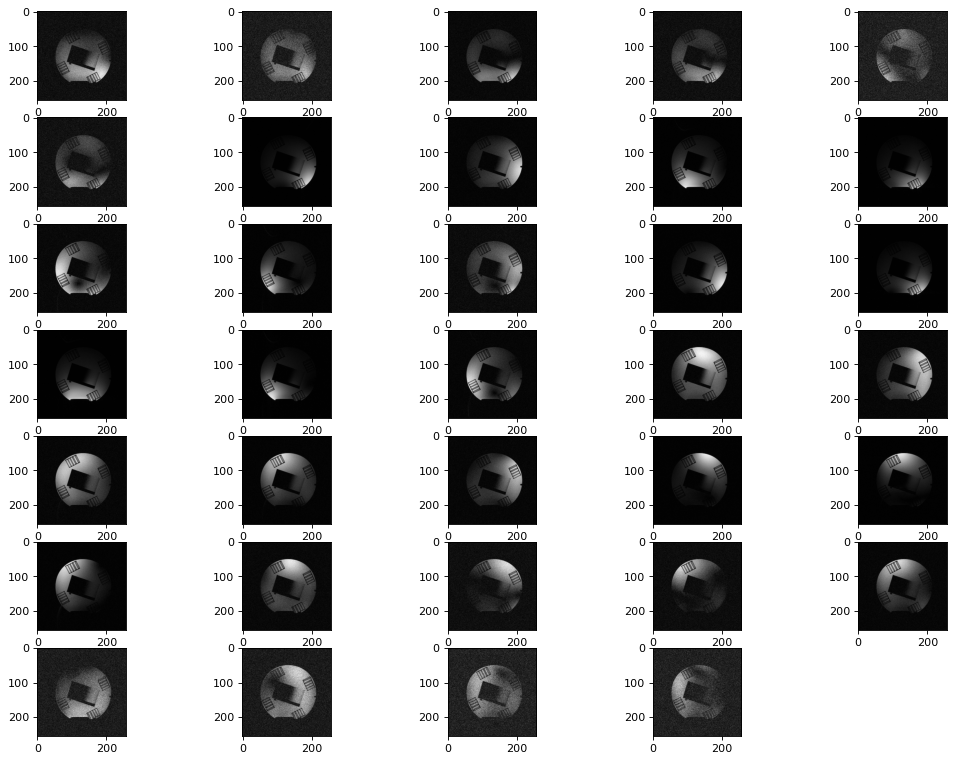

In [3]:
show(ifft2c(data))

In [4]:
recon = grappa(dataR, acs, method = "mul")

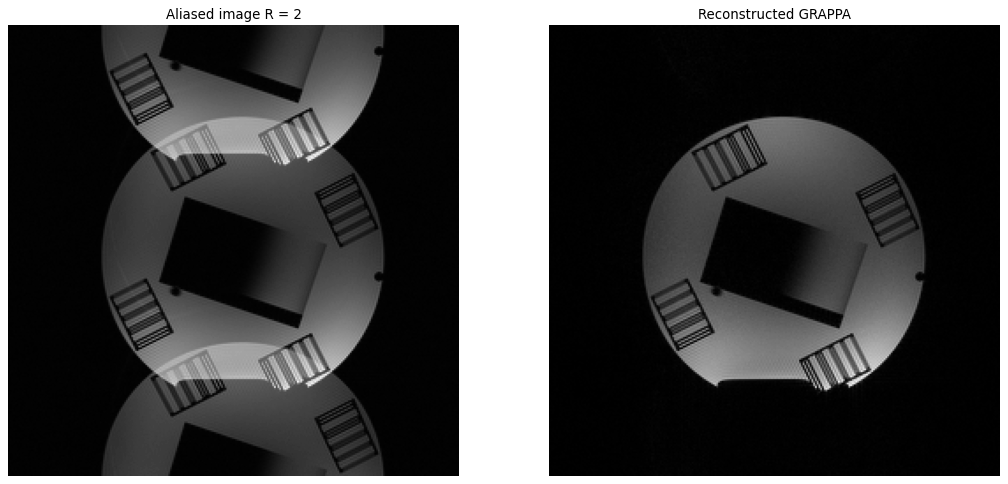

In [5]:
plt.figure(figsize=(16, 12), dpi=80)
plt.subplot(121)
plt.imshow(np.abs(rsos(ifft2c(dataR))),cmap='gray')
plt.title("Aliased image R = "+str(R))
plt.axis('off')
plt.subplot(122)
plt.axis('off')
plt.imshow(np.abs((recon)),cmap='gray')
plt.title("Reconstructed GRAPPA")
plt.savefig("grappa.png")
plt.show()